# Wednesday, October 16th, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generating tartan patterns:

Let's try to generate a tartan pattern with the following layout:
 * One stripe of width `20` and RGB-value `(1,.7,.7)`
 * One stripe of width `35` and RGB-value `(0,.2,.9)`
 * One stripe of width `12` and RGB-value `(1,1,0)`
 * One stripe of width `18` and RGB-value `(.2,1,.2)`

In [33]:
vertical_stripes = np.zeros((85,85,3))  # 85x85 image with 3 layers for R,G,B

vertical_stripes[:,0:20] = (1, .7, .7)
vertical_stripes[:,20:55] = (0,.2,.9)
vertical_stripes[:,55:67] = (1,1,0)
vertical_stripes[:,67:85] = (.2,1,.2)

While this code successfully generates the desired stripes, it is not adaptable at all to other patterns.

**Exercise:** Try to generate these stripes in a more automated way.

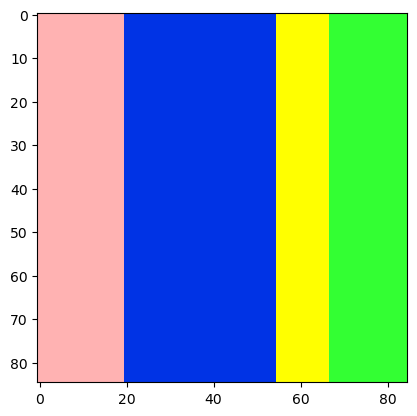

In [34]:
plt.imshow(vertical_stripes)

In [14]:
widths = [20, 35, 12, 18]
RGBs = [(1,.7,.7), (0,.2,.9), (1,1,0), (.2,1,.2)]

for i in range(len(widths)): # iterate through the indices of each width
    width = widths[i]
    RGB = RGBs[i]
    
    print(width, RGB)

20 (1, 0.7, 0.7)
35 (0, 0.2, 0.9)
12 (1, 1, 0)
18 (0.2, 1, 0.2)


We can use the `zip` function to iterate through two lists in parallel:

In [15]:
for width, RGB in zip(widths, RGBs):
    print(width,RGB)

20 (1, 0.7, 0.7)
35 (0, 0.2, 0.9)
12 (1, 1, 0)
18 (0.2, 1, 0.2)


Note: this functions completely differently from nested for loops, which would consider all possible combinations:

In [16]:
for width in widths:
    for RGB in RGBs:
        print(width, RGB)

20 (1, 0.7, 0.7)
20 (0, 0.2, 0.9)
20 (1, 1, 0)
20 (0.2, 1, 0.2)
35 (1, 0.7, 0.7)
35 (0, 0.2, 0.9)
35 (1, 1, 0)
35 (0.2, 1, 0.2)
12 (1, 0.7, 0.7)
12 (0, 0.2, 0.9)
12 (1, 1, 0)
12 (0.2, 1, 0.2)
18 (1, 0.7, 0.7)
18 (0, 0.2, 0.9)
18 (1, 1, 0)
18 (0.2, 1, 0.2)


Alternatively, we can restructure our data:

In [17]:
P = (1,.7,.7)
B = (0,.2,.9)
Y = (1,1,0)
G = (.2,1,.2)

width_RGBs = [(20, P), 
              (35, B), 
              (12, Y),
              (18, G)]

for width,RGB in width_RGBs:
    print(width, RGB)

20 (1, 0.7, 0.7)
35 (0, 0.2, 0.9)
12 (1, 1, 0)
18 (0.2, 1, 0.2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


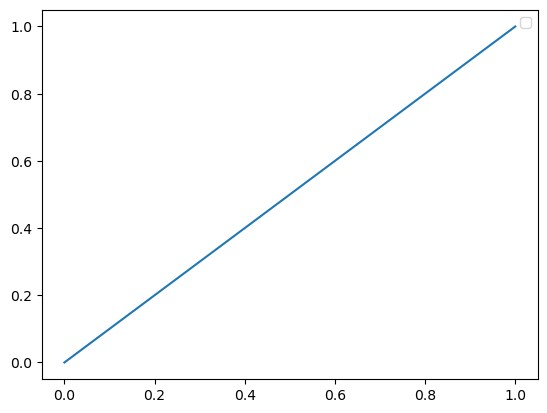

In [23]:
plt.plot([0,1],[0,1],label=None)
plt.legend()

In [25]:
print('hello\\ngoodbye\nfor real')

hello\ngoodbye
for real


In [26]:
print(r'hello\\ngoodbye\nfor real')

hello\\ngoodbye\nfor real


Once we've generated vertical stripes, it is very easy to obtain the corresponding horizontal stripes using the `transpose` function (or the `.T` method).

In [35]:
my_array = np.arange(10).reshape(5,2)

In [36]:
my_array

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [37]:
my_array.T

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

In [38]:
vertical_stripes.shape

(85, 85, 3)

In [40]:
(vertical_stripes.T).shape

(3, 85, 85)

For an `(M,N,3)` array of RGB data, we can't use the `.T` method since we want to obtain a `(N,M,3)` array (i.e. we just want to swap rows and columns).

Instead, we can use `np.transpose`:

In [41]:
help(np.transpose)

Help on function transpose in module numpy:

transpose(a, axes=None)
    Returns an array with axes transposed.
    
    For a 1-D array, this returns an unchanged view of the original array, as a
    transposed vector is simply the same vector.
    To convert a 1-D array into a 2-D column vector, an additional dimension
    must be added, e.g., ``np.atleast2d(a).T`` achieves this, as does
    ``a[:, np.newaxis]``.
    For a 2-D array, this is the standard matrix transpose.
    For an n-D array, if axes are given, their order indicates how the
    axes are permuted (see Examples). If axes are not provided, then
    ``transpose(a).shape == a.shape[::-1]``.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axes : tuple or list of ints, optional
        If specified, it must be a tuple or list which contains a permutation
        of [0,1,...,N-1] where N is the number of axes of `a`. The `i`'th axis
        of the returned array will correspond to the axis num

We want to swap rows and columns, which means we want to perform a permutation `[1,0,2]` on the dimensions of the array:

In [44]:
horizontal_stripes = np.transpose(vertical_stripes,[1,0,2])

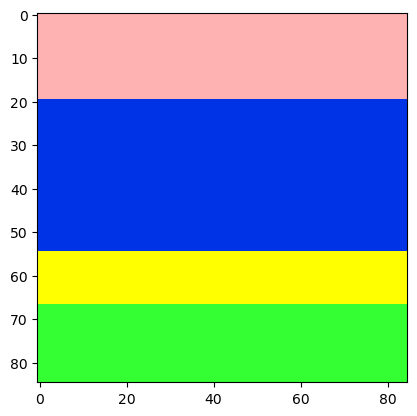

In [45]:
plt.imshow(horizontal_stripes)